# Baltimore Crime Data
## Jake Belden
 
In this project we will visualize and model crime data from the city of Baltimore using Python and some of its public packages and Baltimore Police Departments public arrest data spanning from the years 2016 to 2021. Whilst learning more about data science and how we can use data science to make more informed decisions.

In [3]:
# install our packages
!pip install folium
!pip install sklearn
import folium
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
# create our dataframe for the Baltimore arrest data.
arrest_table = pd.read_csv("Part1_Crime_data.csv")

# Lets take a look at our dataframe in its current state
arrest_table.head()

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1.399884e+06,605849.159628,1,2021/12/11 09:56:00+00,4E,4300 LIBERTY HEIGHTS AVE,COMMON ASSAULT,NaN,NaN,621,NORTHWEST,DORCHESTER,39.3298,-76.6905,"(39.3298,-76.6905)",NaN,NaN,1,NaN
1,1.420074e+06,594160.602355,2,2021/12/11 07:30:00+00,4E,200 W MONUMENT ST,COMMON ASSAULT,NaN,NaN,124,CENTRAL,MOUNT VERNON,39.2975,-76.6193,"(39.2975,-76.6193)",NaN,NaN,1,NaN
2,1.432217e+06,593777.010712,3,2021/12/11 10:15:00+00,3N,400 N LINWOOD AVE,ROBBERY - STREET,NaN,OTHER,221,SOUTHEAST,ELLWOOD PARK/MONUMENT,39.2963,-76.5764,"(39.2963,-76.5764)",NaN,NaN,1,NaN
3,1.434982e+06,601511.847421,4,2021/12/11 21:05:00+00,4E,3700 ELMLEY AVE,COMMON ASSAULT,NaN,NaN,432,NORTHEAST,BELAIR-EDISON,39.3175,-76.5665,"(39.3175,-76.5665)",NaN,NaN,1,NaN
4,1.414038e+06,589000.414832,5,2021/12/11 22:30:00+00,4E,1500 RAMSAY ST,COMMON ASSAULT,NaN,NaN,935,SOUTHERN,NEW SOUTHWEST/MOUNT CLARE,39.2834,-76.6407,"(39.2834,-76.6407)",NaN,Tri-District,1,NaN


As we look at our new data frame, we can see it is kinda messy and is carrying a lot of infromation we will not use, so let's clean it up a bit.

In [5]:
# Get rid of any unwanted columns
arrest_table.drop(columns = ['RowID','Inside_Outside','Weapon', 'Premise', 'VRIName', 'Shape', 'Total_Incidents', 'X', 'Y'], inplace = True)

In [6]:
# Drop anything with the value 'NaN' in our table
arrest_table.dropna(inplace=True)

In [7]:
# Lets take a look at our dataframe in its current state
arrest_table

,CrimeDateTime,CrimeCode,Location,Description,Post,District,Neighborhood,Latitude,Longitude,GeoLocation
0,2021/12/11 09:56:00+00,4E,4300 LIBERTY HEIGHTS AVE,COMMON ASSAULT,621,NORTHWEST,DORCHESTER,39.3298,-76.6905,"(39.3298,-76.6905)"
1,2021/12/11 07:30:00+00,4E,200 W MONUMENT ST,COMMON ASSAULT,124,CENTRAL,MOUNT VERNON,39.2975,-76.6193,"(39.2975,-76.6193)"
2,2021/12/11 10:15:00+00,3N,400 N LINWOOD AVE,ROBBERY - STREET,221,SOUTHEAST,ELLWOOD PARK/MONUMENT,39.2963,-76.5764,"(39.2963,-76.5764)"
3,2021/12/11 21:05:00+00,4E,3700 ELMLEY AVE,COMMON ASSAULT,432,NORTHEAST,BELAIR-EDISON,39.3175,-76.5665,"(39.3175,-76.5665)"
4,2021/12/11 22:30:00+00,4E,1500 RAMSAY ST,COMMON ASSAULT,935,SOUTHERN,NEW SOUTHWEST/MOUNT CLARE,39.2834,-76.6407,"(39.2834,-76.6407)"
...,...,...,...,...,...,...,...,...,...,...
265921,2016/01/01 00:00:00+00,4E,200 SAINT PAUL ST,COMMON ASSAULT,111,CENTRAL,DOWNTOWN,39.2921,-76.6135,"(39.2921,-76.6135)"
265922,2016/01/01 02:00:00+00,4E,700 BROADWAY,COMMON ASSAULT,213,SOUTHEAST,FELLS POINT,39.2835,-76.5936,"(39.2835,-76.5936)"
265923,2016/01/01 15:15:00+00,4E,1500 LOCHWOOD RD,COMMON ASSAULT,412,NORTHEAST,HILLEN,39.3426,-76.5915,"(39.3426,-76.5915)"
265924,2016/01/01 22:15:00+00,7A,3800 9TH ST,AUTO THEFT,913,SOUTHERN,BROOKLYN,39.2329,-76.5988,"(39.2329,-76.5988)"


Yep that is looking much better now!

We can use folium to create a map, lets make a map of baltimore to help visulaize some of this arrest data. We will define our map as being constrained within the coordinates 39.29, -76.61 with a zoom level of 11.

For further reading our folium and its features I would reccomend checking out the official site for the library and the library's documentation, https://python-visualization.github.io/folium/modules.html

In [50]:
# Create our map
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=11)

# Display our map
map_osm

Folium creates a python interface for leaflet.js, a javascript library for interactble maps. Which allows us to do more than just make interactble maps, for instance we can plot individual interactable markers on that map as we will do with our crime data. For more on what you can do with folium maps, check out this site: https://python-visualization.github.io/folium/quickstart.html#Markers

We can use the data within the dataframe to plot points on our map where offences have occured. Lets take a look at Common Assualt through the years, we will use crime code "4E" for this. For brevity, lets plot 10 arrests per year. 

In [51]:
# Reset our map, so we can plot new data on it
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=11)

# create a year counter and counter for later
year = 2021
ct = 0

# create a colors array for coloring our points
colors= ['darkgreen', 'darkred', 'cadetblue', 'blue', 'pink', 'beige', 'darkblue', 'lightgreen', 
         'purple', 'lightred', 'red', 'white', 
         'darkpurple', 'black', 'gray', 'orange', 
         'lightblue', 'green', 'lightgray']

# arrests we want to look at
arrests = ["4E"]

# for each arrest in the table
for i in arrest_table.index:
    
    # for each year, pick 15 arrests in that year
    if arrest_table.at[i, 'CrimeCode'] in arrests and int(arrest_table.at[i,"CrimeDateTime"][:4]) == year:
        
        # update year and counter
        if ct == 15:
            ct = 0
            year -= 1
        
        # create markers
        folium.Marker(
        location= (arrest_table.at[i, "Latitude"], arrest_table.at[i,"Longitude"]),
        popup=arrest_table.at[i, 'Location'] + ', ' + arrest_table.at[i,"CrimeDateTime"][:9],
        icon=folium.Icon(color=colors[int(arrest_table.at[i,"CrimeDateTime"][:4]) % 19]),
        ).add_to(map_osm)
        
        # Update our counter
        ct += 1
        
# Display our map
map_osm

In this map I have laid out and color codded markers for a set of crimes that took place in Baltimore. The crime we chose to display was "Common Assault". As we can see from the map, each marker is colored codded based on the year the arrest occured in and each marker displays the location of the incident and the date that the incident occured on.

Looking at our map, its not clear if there are any patterns in the data so lets dive a little deeper into the data and see if we can find any.

First lets take a look "Common Assault" over time

<AxesSubplot:title={'center':'Number of Common Assaults Per Year'}, xlabel='Year'>

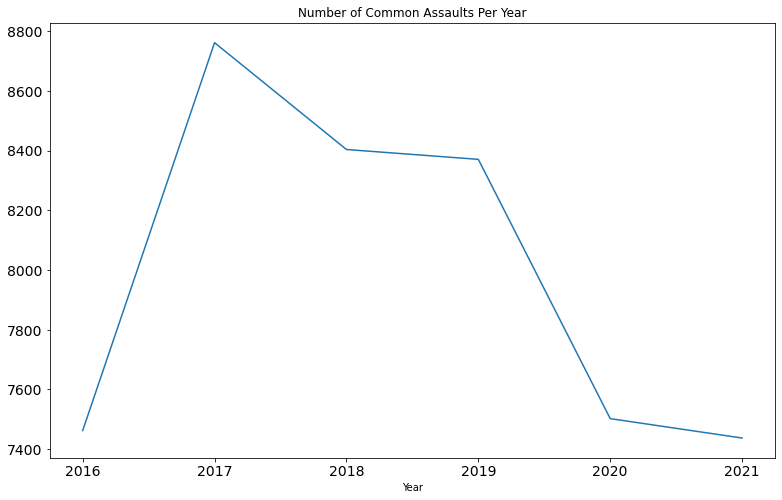

In [10]:
# Create a table with only Common Assualt charges
assault_table = arrest_table.where(arrest_table['CrimeCode'] == '4E').dropna()

# Create a dictionary for the data, we will pre fill them with a default value of 0 for every year
a = {'2021': 0, '2020': 0, '2019': 0, '2018': 0, '2017': 0, '2016': 0}


# Fill in the dictionary with years as the key
for i in assault_table.index:
    # Count number of assaults per year
    a[arrest_table.at[i,"CrimeDateTime"][:4]] += 1
    
# Create a temporary dictionary for years and number of assaults
temp = {'Year': ['2016', '2017', '2018', '2019', '2020', '2021'],
        'Number of Common Assaults': [a['2016'], a['2017'], a['2018'], a['2019'], a['2020'], a['2021']]
       }

# Push this temporary dict into our dataframe
assaults = pd.DataFrame(temp,columns=['Year','Number of Common Assaults'])

# Plot our dataframe in line plot form
assaults.plot(x ='Year', y='Number of Common Assaults', kind = 'line', title= 'Number of Common Assaults Per Year'
              ,legend= False, figsize=(13,8), fontsize=14)

As we can see from this line graph the number of common assaults in Baltimore spiked in the 2017, but has since fallen back to the level it was at 2016.

Pandas presents many different ways to visualize data, for further more information I reccomend reading the numpy documentation on the plot method here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

For instance, we can also visulize this graph in bar chart form:

<AxesSubplot:title={'center':'Number of Common Assaults Per Year'}, xlabel='Year'>

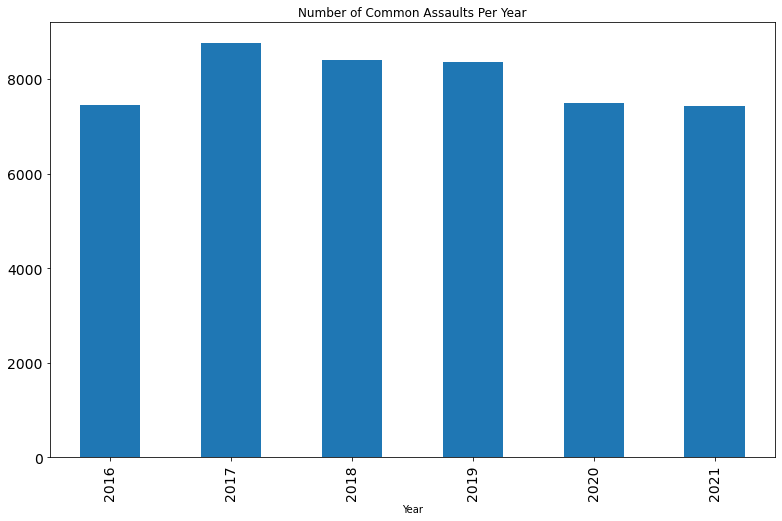

In [11]:
# Plot our dataframe in bar chart form
assaults.plot(x ='Year', y='Number of Common Assaults', kind = 'bar', title= 'Number of Common Assaults Per Year'
              ,legend= False, figsize=(13,8), fontsize=14)

Since libraries like Pandas and Numpy present us with many ways of plotting our data, and this is something we must carefully consider when working with data visualizations. As visualizing data can effect the way our audience will interpret our data, we must be careful and make sure the visual we decide to use displays our data in a way that does not confuse or mislead our data. Something as simple as reversing the order the years are displayed in for instance, could easily confuse a user of our data if they were not looking carefully. Under that assumption we could potentially make users think that 2020 had the highest number of common assaults in Baltimore, just by doing something as simple as reversing the years could change the outlook on the data entirely. 

Now that we know more about common assaults over the years, we should take a look at where these arrests for assaults are happening.

In [12]:
# Make our locations dict
locations = {}

# Create a key, value pair for every neighborhood and assign the default value to 0
for i in arrest_table.Neighborhood.unique():
    locations[i] = 0

# Tally up the assaults that happened in each neighborhood 
for i in assault_table.Neighborhood:
    locations[i] += 1

# Display our dictionary
locations

{'DORCHESTER': 177,
 'MOUNT VERNON': 562,
 'ELLWOOD PARK/MONUMENT': 461,
 'BELAIR-EDISON': 1019,
 'NEW SOUTHWEST/MOUNT CLARE': 213,
 'UNIVERSITY OF MARYLAND': 181,
 'DOWNTOWN': 1983,
 'ROSEMONT HOMEOWNERS/TENANTS': 146,
 'CHARLES NORTH': 250,
 'INNER HARBOR': 464,
 'ROSEBANK': 30,
 'BALTIMORE HIGHLANDS': 443,
 'MORRELL PARK': 476,
 'BROOKLYN': 922,
 'PARK CIRCLE': 226,
 'WOODBERRY': 69,
 'PARKLANE': 145,
 'HILLEN': 68,
 'FRANKFORD': 1193,
 'JONESTOWN': 231,
 'PATTERSON PARK NEIGHBORHOOD': 357,
 'WALBROOK': 241,
 'CENTRAL FOREST PARK': 83,
 'DARLEY PARK': 127,
 'GREENMOUNT WEST': 183,
 'KENILWORTH PARK': 62,
 'HAMPDEN': 259,
 'FRANKLINTOWN ROAD': 160,
 'HAWKINS POINT': 11,
 'HAMILTON HILLS': 562,
 'CANTON INDUSTRIAL AREA': 108,
 "BUTCHER'S HILL": 64,
 'DOLFIELD': 136,
 'GAY STREET': 240,
 'FOUR BY FOUR': 101,
 'CARROLL - CAMDEN INDUSTRIAL AREA': 371,
 'DUNBAR-BROADWAY': 525,
 'RESERVOIR HILL': 473,
 'CHERRY HILL': 806,
 'ARLINGTON': 257,
 'WESTPORT': 171,
 'MID-TOWN BELVEDERE': 251,
 'C

This data is useful as now we can answer questions such as how many common assaults took place in Federal Hill between 2016 and 2021?

In [13]:
# Answer the question "how many common assaults took place in Federal Hill between 2016 and 2021?"
locations['FEDERAL HILL']

210

This data is indeed useful, however it is not very readable or clean looking.

One of the most important aspects of working with data is making sure that data is usable by people. In order to make sure its usable, we need to make sure its readable. What we currently have is not readable; therefore, we must find other ways to present this data in a more human friendly format, whilst still keeping its functionality. Luckily for us, we have pandas dataframes for that.

In [14]:
# Make a temporary dictionary for our dataframe
temp = {'Neighborhoods' : arrest_table.Neighborhood.unique(), 'Number of Assaults': [x for x in locations.values()]}

# Make a dataframe out of our temp dict
locations_table = pd.DataFrame(data=temp)

# Display our dataframe
locations_table.head()

,Neighborhoods,Number of Assaults
0,DORCHESTER,177
1,MOUNT VERNON,562
2,ELLWOOD PARK/MONUMENT,461
3,BELAIR-EDISON,1019
4,NEW SOUTHWEST/MOUNT CLARE,213


Looking better already! Have we lost any functionality from this change? Lets try and see if we can pull common assaults from Federal Hill again.

In [55]:
locations_table.where(locations_table['Neighborhoods'] == 'FEDERAL HILL').dropna()

,Neighborhoods,Number of Assaults
128,FEDERAL HILL,210.0


No! We have not lost any functionality whatsover, yet we have gained a great deal of readability! This is one of the many reasons why dataframes are so amazing!

Now that we have the data more readable, lets do some more digging into the data.
Lets see if we can do something simple like see what neighborhood has the most and least common assaults.

In [15]:
# Sort our dataframe by increasing values in our "Number of Assaults" column
locations_table.sort_values(by=['Number of Assaults'], ascending= False, inplace= True)

# Show us the top 5 neighborhoods for common assault
locations_table.head()

,Neighborhoods,Number of Assaults
6,DOWNTOWN,1983
18,FRANKFORD,1193
3,BELAIR-EDISON,1019
13,BROOKLYN,922
79,UPTON,889


In [16]:
# Show us the bottom 5 neighborhoods for common assault
locations_table.tail()

,Neighborhoods,Number of Assaults
246,MT PLEASANT PARK,2
217,CURTIS BAY INDUSTRIAL AREA,2
269,BELLONA-GITTINGS,0
236,BLYTHEWOOD,0
277,DUNDALK MARINE TERMINAL,0


We can! And we can do this while having the output be very friendly to humans!

Okay now that we have played around a bit with the data, lets actually get into some data science with this assault dataframe.

To do this we will make use of the data within the dataframe, specificially our year, latitude, and longitude to attempt to use k-means clustering in order to predict our the neighborhood of the arrest. 

K-means clustering aims to partition observations into k clusters in which each observation belongs to the cluster with the nearest mean. Luckily for us python has some very useful public libraries that we can use in order to help us with our k-means clustering. In this instance, we will make use of sklearn and specifically utilize KMeans, silhouette_score, and StandardScalar. 

For more information on utilizing k-means clustering in python, check out this link https://realpython.com/k-means-clustering-python/

In [17]:
# Lets remember what we have in this assault table
assault_table.head()

,CrimeDateTime,CrimeCode,Location,Description,Post,District,Neighborhood,Latitude,Longitude,GeoLocation
0,2021/12/11 09:56:00+00,4E,4300 LIBERTY HEIGHTS AVE,COMMON ASSAULT,621,NORTHWEST,DORCHESTER,39.3298,-76.6905,"(39.3298,-76.6905)"
1,2021/12/11 07:30:00+00,4E,200 W MONUMENT ST,COMMON ASSAULT,124,CENTRAL,MOUNT VERNON,39.2975,-76.6193,"(39.2975,-76.6193)"
3,2021/12/11 21:05:00+00,4E,3700 ELMLEY AVE,COMMON ASSAULT,432,NORTHEAST,BELAIR-EDISON,39.3175,-76.5665,"(39.3175,-76.5665)"
4,2021/12/11 22:30:00+00,4E,1500 RAMSAY ST,COMMON ASSAULT,935,SOUTHERN,NEW SOUTHWEST/MOUNT CLARE,39.2834,-76.6407,"(39.2834,-76.6407)"
5,2021/12/11 23:40:00+00,4E,3600 KENYON AVE,COMMON ASSAULT,432,NORTHEAST,BELAIR-EDISON,39.3193,-76.5626,"(39.3193,-76.5626)"


In [18]:
# Create a dataframe for our k means clustering
k_table = assault_table[['CrimeDateTime', 'Latitude', 'Longitude']]
k_table['Year'] = [0] * 47938

<ipython-input-18-bc4dc2b28fc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_table['Year'] = [0] * 47938


In [19]:
# clean up our table and turn it all into numbers
for i in k_table.index:
    k_table.loc[i, 'Year'] = int(k_table.loc[i, 'CrimeDateTime'][:4])
    k_table.loc[i, 'Latitude'] = float(k_table.loc[i, 'Latitude'])
    k_table.loc[i, 'Longitude'] = float( k_table.loc[i, 'Longitude'])

# Drop our old column
k_table.drop(columns = ['CrimeDateTime'], inplace=True)

# Display our dataframe
k_table.head()

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Latitude,Longitude,Year
0,39.3298,-76.6905,2021
1,39.2975,-76.6193,2021
3,39.3175,-76.5665,2021
4,39.2834,-76.6407,2021
5,39.3193,-76.5626,2021


We can use our domain knowledge in order to try to figure out what the optimal number of k clusters should be. For our intial run, lets try 278 k clusters as we know there are 278 neighborhoods in our data set. Also we will use 300 max iterations as a nice number that will not take too long but will still provide a good result.

In [28]:
# Make our KMeans object
kmeans = KMeans(
    init="random",
    n_clusters=278,
    max_iter=300)

# Make our scaled featrues
features = k_table.to_numpy()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 0.86770458, -1.64738929,  1.52085429],
       [-0.2617595 ,  0.01512981,  1.52085429],
       [ 0.43759906,  1.24800913,  1.52085429],
       ...,
       [-0.45058631,  0.15055973, -1.47168815],
       [-0.7513105 ,  0.61522448, -1.47168815],
       [ 1.31529406,  0.66425945, -1.47168815]])

In [29]:
# Run kmeans
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=278)

In [30]:
# Lets see some of our clusters
kmeans.cluster_centers_[:5]

array([[ 1.56456348, -1.34476068,  0.32383731],
       [-0.2235928 , -0.97960619,  1.52085429],
       [ 1.08021421, -0.38680838, -0.27467117],
       [-0.46312071, -0.062523  ,  1.52085429],
       [ 0.12688404, -1.15646443, -0.27467117]])

In [31]:
# Output our labels
kmeans.labels_[:5]

array([172,   3,  74, 104,  74], dtype=int32)

In [32]:
# Make an answers list for every label we made
ans = list()

# Place every label we made into our answer list
for i in range(0, len(kmeans.labels_)):
    if kmeans.labels_[i] == 172:
        ans.append(i)

In [33]:
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_).round(2)
kmeans_silhouette

0.39

A silhouette score of 0.39 indicates that our k means isn't too bad, with a larger score indicating that points are closer to to their clusters than they are to other clusters.

However, we should still try and see if a better value for k exists for us, to do this we will run through the k values between 2 and 50 and see who has the best silhouette score. In the interest of time, we will only run 1 iteration per k value.

In [35]:
# silhouette score array
silhouette_coef = []

# for every k value from 2 to 278, run our k means and check the silhouette score
for k in range(2, 50):  
    kkmeans = KMeans(n_clusters=k, init="random", max_iter=1)
    kkmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kkmeans.labels_)
    silhouette_coef.append(score)

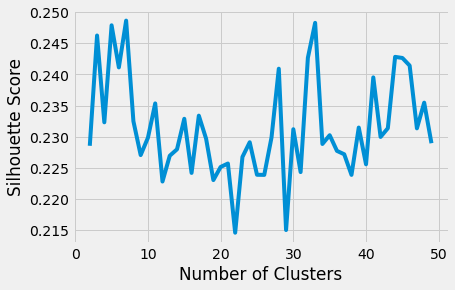

In [36]:
# plot our graph of the average silhouette coefficient scores
plt.style.use("fivethirtyeight")
plt.plot(range(2, 50), silhouette_coef)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Based on our graph of the silhouette coefficient the optimal number for k would be 8, with a value of 0.25, still short of our value of 0.39 with 278 clusters. Therefore, we can assume our k value should indeed be set to a value of 278 for optimal clustering.

In [43]:
# Make another k means with the same parameters as last time but this time with 8 clusters
kkmeans = KMeans(n_clusters=8, init="random", max_iter=300)
kkmeans.fit(scaled_features)

KMeans(init='random')

In [44]:
# Output our labels
kkmeans.labels_[:5]

array([1, 7, 6, 1, 6], dtype=int32)

In [45]:
# Make an answers list for every label we made
ans = list()

# Place every label we made into our answer list
for i in range(0, len(kkmeans.labels_)):
    if kkmeans.labels_[i] == 1:
        ans.append(i)

In [49]:
# Calculate the silhouette score for our new k means
kkmeans_silhouette = silhouette_score(
    scaled_features, kkmeans.labels_).round(2)
# Output our silhouette score
kkmeans_silhouette

0.28

 Running our new k means with 8 clusters and 300 max iterations we found the silhouette score to be 0.28, confirming that this value is not as effective as our previous k value of 278 at clustering our data.

Today, we have explored some of the things you can do in the field of data science with baltimore crime data, but as you may have noticed this is only the tip of the iceberg. There is a lot more data in this file that can we utilized and played with, and many many files just like it all over the internet. There are also many more techniques in data science that could be used with this data to find and display many of the interesting details of this data to help inform or help people make smarter decisions using this data. And that is what data science is all about, helping people make better decisions using the data given. I emplore you to root around in this data and see what you can find on your own.